In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2a0a4c19858252e565557c519c54d56


In [21]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [32]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 29 of Set 25 | bonavista
Processing Record 30 of Set 25 | cape town
Processing Record 31 of Set 25 | reconquista
Processing Record 32 of Set 25 | busselton
Processing Record 33 of Set 25 | marathon
Processing Record 34 of Set 25 | rikitea
Processing Record 35 of Set 25 | ashland
Processing Record 36 of Set 25 | port alfred
Processing Record 37 of Set 25 | kapaa
Processing Record 38 of Set 25 | tawkar
City not found. Skipping...
Processing Record 39 of Set 25 | sinnamary
Processing Record 40 of Set 25 | albany
Processing Record 41 of Set 25 | mataura
Processing Record 42 of Set 25 | amderma
City not found. Skipping...
Processing Record 43 of Set 25 | butaritari
Processing Record 44 of Set 25 | qaanaaq
Processing Record 45 of Set 25 | urumqi
Processing Record 46 of Set 25 | yar-sale
Processing Record 47 of Set 25 | yellowknife
Processing Record 48 of Set 25 | saint-joseph
Processing Record 49 of Set 25 | arlit
Processing Record 50 of Set 25 | flong
Processing Record 51 

Processing Record 32 of Set 28 | pevek
Processing Record 33 of Set 28 | ribeira grande
Processing Record 34 of Set 28 | tura
Processing Record 35 of Set 28 | lorengau
Processing Record 36 of Set 28 | astoria
Processing Record 37 of Set 28 | nome
Processing Record 38 of Set 28 | saint-philippe
Processing Record 39 of Set 28 | kamaishi
Processing Record 40 of Set 28 | madera
Processing Record 41 of Set 28 | zhitikara
City not found. Skipping...
Processing Record 42 of Set 28 | bambanglipuro
Processing Record 43 of Set 28 | tautira
Processing Record 44 of Set 28 | rio gallegos
Processing Record 45 of Set 28 | fairbanks
Processing Record 46 of Set 28 | qasigiannguit
Processing Record 47 of Set 28 | zhanatas
City not found. Skipping...
Processing Record 48 of Set 28 | hilo
Processing Record 49 of Set 28 | naustdal
Processing Record 50 of Set 28 | brae
Processing Record 1 of Set 29 | sukhoverkovo
City not found. Skipping...
Processing Record 2 of Set 29 | qaqortoq
Processing Record 3 of Set 

Processing Record 16 of Set 32 | nelson bay
Processing Record 17 of Set 32 | puerto quijarro
Processing Record 18 of Set 32 | katangli
Processing Record 19 of Set 32 | abay
Processing Record 20 of Set 32 | dalton
Processing Record 21 of Set 32 | ponta delgada
Processing Record 22 of Set 32 | port lincoln
Processing Record 23 of Set 32 | tigil
Processing Record 24 of Set 32 | naze
Processing Record 25 of Set 32 | kamina
Processing Record 26 of Set 32 | miyako
Processing Record 27 of Set 32 | pontes e lacerda
Processing Record 28 of Set 32 | bilibino
Processing Record 29 of Set 32 | atka
City not found. Skipping...
Processing Record 30 of Set 32 | ligayan
Processing Record 31 of Set 32 | dingle
Processing Record 32 of Set 32 | inuvik
Processing Record 33 of Set 32 | conceicao do araguaia
Processing Record 34 of Set 32 | pochutla
Processing Record 35 of Set 32 | iralaya
Processing Record 36 of Set 32 | anadyr
Processing Record 37 of Set 32 | tilichiki
Processing Record 38 of Set 32 | mana

Processing Record 1 of Set 36 | mamakan
Processing Record 2 of Set 36 | lisala
Processing Record 3 of Set 36 | tongliao
Processing Record 4 of Set 36 | vardo
Processing Record 5 of Set 36 | susanville
Processing Record 6 of Set 36 | deloraine
Processing Record 7 of Set 36 | morant bay
Processing Record 8 of Set 36 | deer lake
Processing Record 9 of Set 36 | neka
Processing Record 10 of Set 36 | kalemie
Processing Record 11 of Set 36 | tezu
Processing Record 12 of Set 36 | aykhal
Processing Record 13 of Set 36 | ondorhaan
City not found. Skipping...
Processing Record 14 of Set 36 | carballo
Processing Record 15 of Set 36 | chatham
Processing Record 16 of Set 36 | orissaare
Processing Record 17 of Set 36 | bay roberts
Processing Record 18 of Set 36 | olafsvik
Processing Record 19 of Set 36 | sumbawa
City not found. Skipping...
Processing Record 20 of Set 36 | la palma
Processing Record 21 of Set 36 | libertador general san martin
Processing Record 22 of Set 36 | luanda
Processing Record 

In [34]:
len(city_data)

576

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathurst,-33.4166,149.5806,58.96,89,53,4.81,AU,2022-02-12 19:48:24
1,Bathurst,-33.4166,149.5806,58.96,89,53,4.81,AU,2022-02-12 19:48:24
2,Bathurst,-33.4166,149.5806,58.96,89,53,4.81,AU,2022-02-12 19:48:24
3,Bonavista,48.6499,-53.1147,41.11,80,100,24.11,CA,2022-02-12 19:49:33
4,Cape Town,-33.9258,18.4232,71.10,81,0,16.11,ZA,2022-02-12 19:52:50
5,Reconquista,-29.1500,-59.6500,71.65,58,100,13.94,AR,2022-02-12 19:52:50
6,Busselton,-33.6500,115.3333,56.08,76,0,12.03,AU,2022-02-12 19:52:51
7,Marathon,44.9000,-89.7668,10.99,52,0,10.36,US,2022-02-12 19:52:51
8,Rikitea,-23.1203,-134.9692,78.96,70,1,16.04,PF,2022-02-12 19:50:52
9,Ashland,40.8167,-82.2665,31.59,74,100,12.37,US,2022-02-12 19:50:28


In [36]:
city_data_new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [38]:
city_data_df = city_data_df[city_data_new_column_order]

In [39]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bathurst,AU,2022-02-12 19:48:24,-33.4166,149.5806,58.96,89,53,4.81
1,Bathurst,AU,2022-02-12 19:48:24,-33.4166,149.5806,58.96,89,53,4.81
2,Bathurst,AU,2022-02-12 19:48:24,-33.4166,149.5806,58.96,89,53,4.81
3,Bonavista,CA,2022-02-12 19:49:33,48.6499,-53.1147,41.11,80,100,24.11
4,Cape Town,ZA,2022-02-12 19:52:50,-33.9258,18.4232,71.10,81,0,16.11
5,Reconquista,AR,2022-02-12 19:52:50,-29.1500,-59.6500,71.65,58,100,13.94
6,Busselton,AU,2022-02-12 19:52:51,-33.6500,115.3333,56.08,76,0,12.03
7,Marathon,US,2022-02-12 19:52:51,44.9000,-89.7668,10.99,52,0,10.36
8,Rikitea,PF,2022-02-12 19:50:52,-23.1203,-134.9692,78.96,70,1,16.04
9,Ashland,US,2022-02-12 19:50:28,40.8167,-82.2665,31.59,74,100,12.37


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

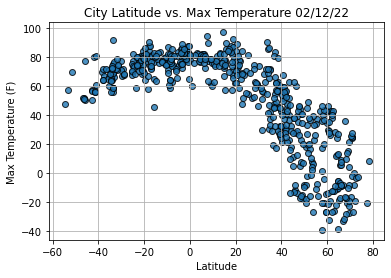

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

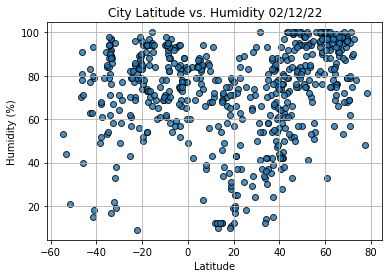

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

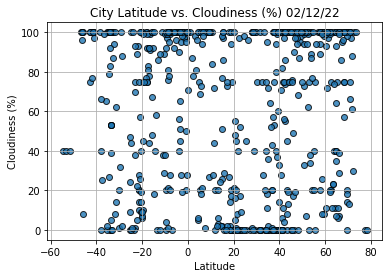

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

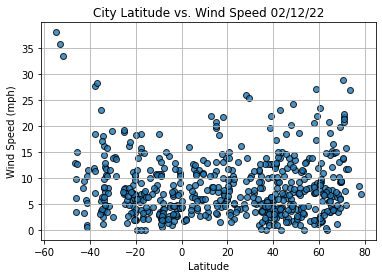

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2022-02-12 19:52:52
Lat                       42.6001
Lng                      -73.9662
Max Temp                    45.23
Humidity                       56
Cloudiness                     55
Wind Speed                    3.0
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
571     True
572     True
573    False
574     True
575    False
Name: Lat, Length: 576, dtype: bool

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bonavista,CA,2022-02-12 19:49:33,48.6499,-53.1147,41.11,80,100,24.11
7,Marathon,US,2022-02-12 19:52:51,44.9000,-89.7668,10.99,52,0,10.36
9,Ashland,US,2022-02-12 19:50:28,40.8167,-82.2665,31.59,74,100,12.37
11,Kapaa,US,2022-02-12 19:50:34,22.0752,-159.3190,77.32,74,40,11.50
12,Sinnamary,GF,2022-02-12 19:52:52,5.3833,-52.9500,78.15,87,69,11.74


In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bonavista,CA,2022-02-12 19:49:33,48.6499,-53.1147,41.11,80,100,24.11
7,Marathon,US,2022-02-12 19:52:51,44.9000,-89.7668,10.99,52,0,10.36
9,Ashland,US,2022-02-12 19:50:28,40.8167,-82.2665,31.59,74,100,12.37
11,Kapaa,US,2022-02-12 19:50:34,22.0752,-159.3190,77.32,74,40,11.50
12,Sinnamary,GF,2022-02-12 19:52:52,5.3833,-52.9500,78.15,87,69,11.74
...,...,...,...,...,...,...,...,...,...
569,Eina,NO,2022-02-12 20:07:11,60.6295,10.5993,35.11,97,100,8.70
570,Palafrugell,ES,2022-02-12 20:07:11,41.9174,3.1631,52.47,50,97,1.01
571,Oxbow,CA,2022-02-12 20:07:11,49.2333,-102.1676,6.75,81,100,7.92
572,Sarahan,IN,2022-02-12 20:07:11,31.5167,77.8000,30.04,41,0,11.36


In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bonavista,CA,2022-02-12 19:49:33,48.6499,-53.1147,41.11,80,100,24.11
7,Marathon,US,2022-02-12 19:52:51,44.9000,-89.7668,10.99,52,0,10.36
9,Ashland,US,2022-02-12 19:50:28,40.8167,-82.2665,31.59,74,100,12.37
11,Kapaa,US,2022-02-12 19:50:34,22.0752,-159.3190,77.32,74,40,11.50
12,Sinnamary,GF,2022-02-12 19:52:52,5.3833,-52.9500,78.15,87,69,11.74


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

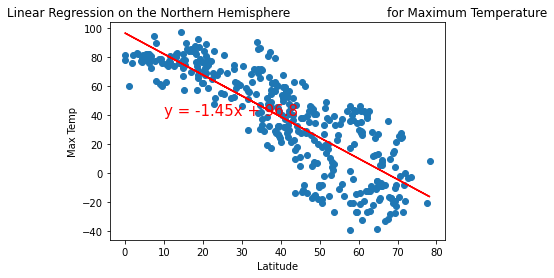

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

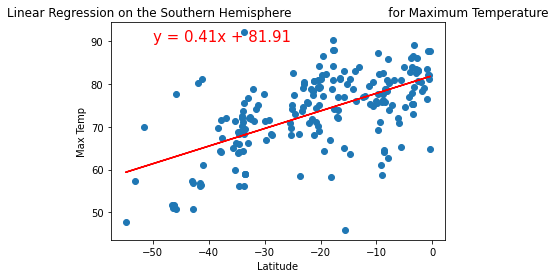

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

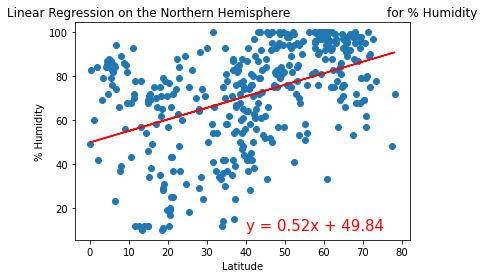

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

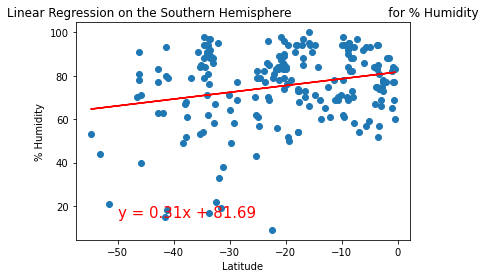

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

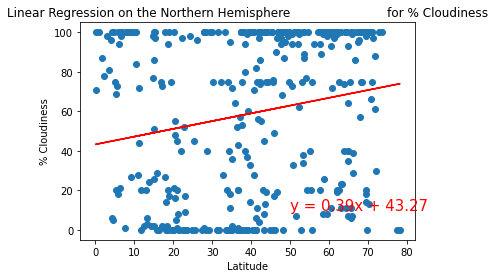

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,10))

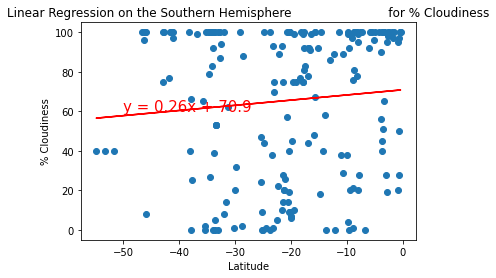

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

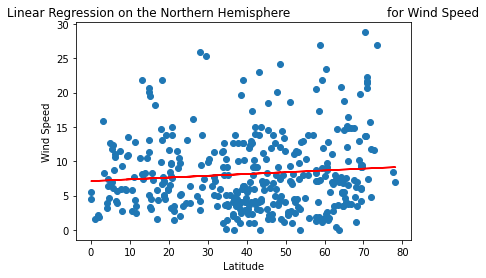

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

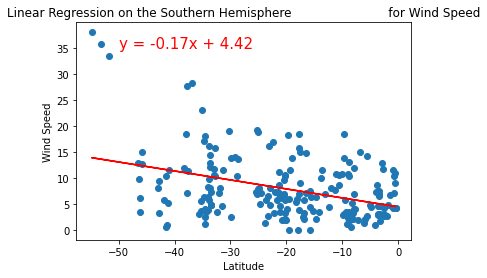

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))